<a href="https://colab.research.google.com/github/navyakarna/PYTORCH_CV/blob/main/Improving_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Loading data
df = pd.read_csv('Zeta_Analytics Dataset.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  14261 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18017 non-null  object 
 6   education_level         17902 non-null  object 
 7   major_discipline        15521 non-null  object 
 8   experience              18300 non-null  object 
 9   company_size            13580 non-null  object 
 10  company_type            13320 non-null  object 
 11  last_new_job            17992 non-null  object 
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

# Data Preprocessing

In [ ]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['gender', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
Number of columns with nans: 8


In [ ]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


Filling Categorical columns with missing values with 'NA'

In [ ]:
cat_miss_cols = ['gender', 'enrolled_university', 'education_level', 'major_discipline','company_size', 'company_type']

In [ ]:
for col in cat_miss_cols:
    print(df[col].unique())

['Male' nan 'Female' 'Other']
['no_enrollment' 'Full time course' 'Part time course' nan]
['Graduate' 'Masters' 'High School' 'Phd' nan 'Primary School']
['STEM' 'Other' 'No Major' nan 'Business Degree' 'Arts' 'Humanities']
['100-500' '<10' '50-99' nan '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
['Pvt Ltd' 'Funded Startup' 'Public Sector' nan 'Early Stage Startup'
 'NGO' 'Other']


In [ ]:
df[cat_miss_cols] = df[cat_miss_cols].fillna('NA')

In [ ]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['experience', 'last_new_job']
Number of columns with nans: 2


In [ ]:
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '>20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '<1' '19' '18' '17' nan '20']
['1' '2' '3' '>4' 'never' '4' nan]


## Replace text data with numbers in some of the columns which have numerical values

In [ ]:
for column in num_miss_cols:
    # This will replace any '>' or '<' with an empty string
    df[column] = df[column].astype(str).str.replace('>', '').astype(str).str.replace('<', '')
    df[column] = df[column].astype(str).str.replace('never', '0')

In [ ]:
num_miss_cols = ['experience', 'last_new_job']
for col in num_miss_cols:
    print(df[col].unique())

['3' '14' '6' '8' '20' '4' '9' '15' '10' '1' '5' '16' '11' '12' '7' '2'
 '13' '19' '18' '17' 'nan']
['1' '2' '3' '4' '0' 'nan']


In [ ]:
for col in num_miss_cols:
    df[col] = pd.to_numeric(df[col].replace('nan', np.NaN))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             18359 non-null  int64  
 1   city                    18359 non-null  object 
 2   city_development_index  18359 non-null  float64
 3   gender                  18359 non-null  object 
 4   relevent_experience     18359 non-null  object 
 5   enrolled_university     18359 non-null  object 
 6   education_level         18359 non-null  object 
 7   major_discipline        18359 non-null  object 
 8   experience              18300 non-null  float64
 9   company_size            18359 non-null  object 
 10  company_type            18359 non-null  object 
 11  last_new_job            17992 non-null  float64
 12  training_hours          18359 non-null  int64  
 13  target                  18359 non-null  int64  
dtypes: float64(3), int64(3), object(8)
mem

In [ ]:
columns_with_nans = df.columns[df.isna().any()].tolist()

# Print the names of columns with NaNs
print("Columns with NaNs:", columns_with_nans)
print("Number of columns with nans:", len(columns_with_nans))

Columns with NaNs: ['experience', 'last_new_job']
Number of columns with nans: 2


We will fill these num columns with missing values after splitting the data with median

## Transform data in the categorical columns by converting then into numerical form, for use with ML algorithms

In [ ]:
cat_cols = df.select_dtypes(include='O').columns
cat_cols

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type'],
      dtype='object')

In [ ]:
for col in cat_cols:
    print(col)
    print(df[col].nunique())

city
123
gender
4
relevent_experience
2
enrolled_university
4
education_level
6
major_discipline
7
company_size
9
company_type
7


City has too many categories. We will be dropping it. You may try to see the performnace by using this columns as well. Also Enrollee_id is an ID column, so it is being dropped

In [ ]:
df.drop(['enrollee_id', 'city'], axis=1, inplace=True)
cat_cols = df.select_dtypes(include='O').columns


In [ ]:
for col in cat_cols:
    print(col)
    print(df[col].unique())

gender
['Male' 'NA' 'Female' 'Other']
relevent_experience
['Has relevent experience' 'No relevent experience']
enrolled_university
['no_enrollment' 'Full time course' 'Part time course' 'NA']
education_level
['Graduate' 'Masters' 'High School' 'Phd' 'NA' 'Primary School']
major_discipline
['STEM' 'Other' 'No Major' 'NA' 'Business Degree' 'Arts' 'Humanities']
company_size
['100-500' '<10' '50-99' 'NA' '5000-9999' '10000+' '1000-4999' '500-999'
 '10/49']
company_type
['Pvt Ltd' 'Funded Startup' 'Public Sector' 'NA' 'Early Stage Startup'
 'NGO' 'Other']


Columns like  education level and company sise have a clear order, and will be transformed using an ordinal encoder, with NA in between. Others will be transformed using One hot encoder

In [ ]:
from sklearn.preprocessing import  OrdinalEncoder

In [ ]:
oc = OrdinalEncoder(
    categories= [['Primary School', 'High School', 'NA','Graduate', 'Masters', 'Phd' ]])
df[['education_level']] = oc.fit_transform(df[['education_level']])
oc.categories_

[array(['Primary School', 'High School', 'NA', 'Graduate', 'Masters',
        'Phd'], dtype=object)]

In [ ]:
oc2 = OrdinalEncoder(
    categories= [[ '<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999', '5000-9999', '10000+']])
df[['company_size']] = oc2.fit_transform(df[['company_size']])
oc2.categories_

[array(['<10', '10/49', '50-99', '100-500', '500-999', 'NA', '1000-4999',
        '5000-9999', '10000+'], dtype=object)]

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,target,gender_Male,gender_NA,gender_Other,...,major_discipline_NA,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Funded Startup,company_type_NA,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
0,0.689,3.0,3.0,3.0,1.0,106,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
1,0.923,3.0,14.0,0.0,1.0,69,0,True,False,False,...,False,False,False,True,True,False,False,False,False,False
2,0.910,3.0,6.0,2.0,2.0,4,0,False,True,False,...,False,False,False,True,False,False,False,False,True,False
3,0.666,3.0,14.0,2.0,1.0,26,0,True,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.887,4.0,8.0,5.0,2.0,88,1,False,True,False,...,False,False,False,True,False,True,False,False,False,False


# Create the train and test dataset, by splitting the input dataframe in the ratio 80:20

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data
X = df.drop('target', axis=1)
y = df['target']
# test_size of 0.2 means train_size is 80% and test_size is 20$
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Filling missing values in numercial columns with median

In [ ]:
exp_median = X_train['experience'].median()
print(exp_median)

X_train.fillna({'experience': exp_median}, inplace=True)
X_test.fillna({'experience': exp_median}, inplace=True)

lnj_median = X_train['last_new_job'].median()
print(lnj_median)

X_train.fillna({'last_new_job': exp_median}, inplace=True)
X_test.fillna({'last_new_job': exp_median}, inplace=True)


9.0
1.0


Normalising data and converting data to numpy

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize data by scaling the train and test datasets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values


Choosing auc score as the metric for evaluation since the data is imbalanced

In [ ]:
df.target.value_counts()

target
0    15934
1     2425
Name: count, dtype: int64

# Define the classes for our dataset and for the Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# Encapsulate out dataset as a class, which inherits from the torch Dataset class
class JobChangeDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

In [ ]:
# Define the neural network Model
class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.sigmoid(self.layer4(x))
        return x


In [ ]:
# Convert numpy to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Define the function to train our NN model and evaluate it

In [ ]:
# Training and Evaluation Loop
def train_and_evaluate_model(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor, y_train_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = JobChangeDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # set the model to train mode for each epoch, since we are setting it to eval mode later
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average

        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(y_train_tensor, model(X_train_tensor))
            test_auc = roc_auc_score(y_test_tensor, model(X_test_tensor))

        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(epochs),train_loss_list, label = 'train')
    plt.plot(range(epochs),test_loss_list, label = 'test')
    plt.legend()
    plt.show()



## Train the model with the SGD optimizer

Epoch 10/100,Train Loss: 0.3729, Test Loss: 0.3832, Train Auc: 0.6510, Test Auc: 0.6422
Epoch 20/100,Train Loss: 0.3710, Test Loss: 0.3833, Train Auc: 0.6591, Test Auc: 0.6452
Epoch 30/100,Train Loss: 0.3697, Test Loss: 0.3824, Train Auc: 0.6648, Test Auc: 0.6455
Epoch 40/100,Train Loss: 0.3683, Test Loss: 0.3821, Train Auc: 0.6704, Test Auc: 0.6470
Epoch 50/100,Train Loss: 0.3668, Test Loss: 0.3826, Train Auc: 0.6766, Test Auc: 0.6469
Epoch 60/100,Train Loss: 0.3650, Test Loss: 0.3828, Train Auc: 0.6836, Test Auc: 0.6469
Epoch 70/100,Train Loss: 0.3636, Test Loss: 0.3847, Train Auc: 0.6910, Test Auc: 0.6441
Epoch 80/100,Train Loss: 0.3619, Test Loss: 0.3881, Train Auc: 0.6969, Test Auc: 0.6443
Epoch 90/100,Train Loss: 0.3589, Test Loss: 0.3876, Train Auc: 0.7046, Test Auc: 0.6401
Epoch 100/100,Train Loss: 0.3572, Test Loss: 0.3871, Train Auc: 0.7168, Test Auc: 0.6331


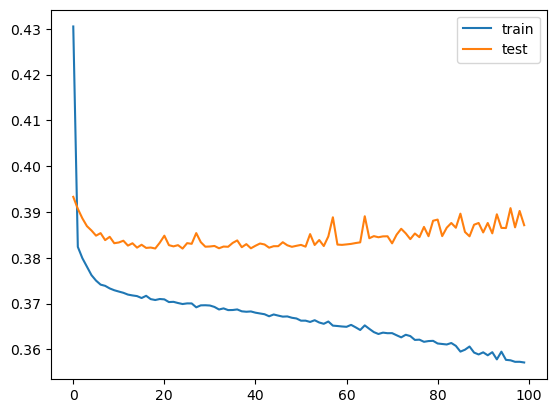

In [ ]:
# We have to create a new model class here due the pass-by-reference feature of python functions
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

## Train the model with the Adam optimizer

Epoch 10/100,Train Loss: 0.3660, Test Loss: 0.3822, Train Auc: 0.6908, Test Auc: 0.6492
Epoch 20/100,Train Loss: 0.3530, Test Loss: 0.3905, Train Auc: 0.7281, Test Auc: 0.6318
Epoch 30/100,Train Loss: 0.3404, Test Loss: 0.4160, Train Auc: 0.7525, Test Auc: 0.6203
Epoch 40/100,Train Loss: 0.3236, Test Loss: 0.4438, Train Auc: 0.7820, Test Auc: 0.5912
Epoch 50/100,Train Loss: 0.3043, Test Loss: 0.5167, Train Auc: 0.8136, Test Auc: 0.5725
Epoch 60/100,Train Loss: 0.2817, Test Loss: 0.5769, Train Auc: 0.8464, Test Auc: 0.5722
Epoch 70/100,Train Loss: 0.2626, Test Loss: 0.7029, Train Auc: 0.8714, Test Auc: 0.5496
Epoch 80/100,Train Loss: 0.2483, Test Loss: 0.7985, Train Auc: 0.8872, Test Auc: 0.5474
Epoch 90/100,Train Loss: 0.2335, Test Loss: 0.8836, Train Auc: 0.8876, Test Auc: 0.5456
Epoch 100/100,Train Loss: 0.2210, Test Loss: 1.0320, Train Auc: 0.9200, Test Auc: 0.5370


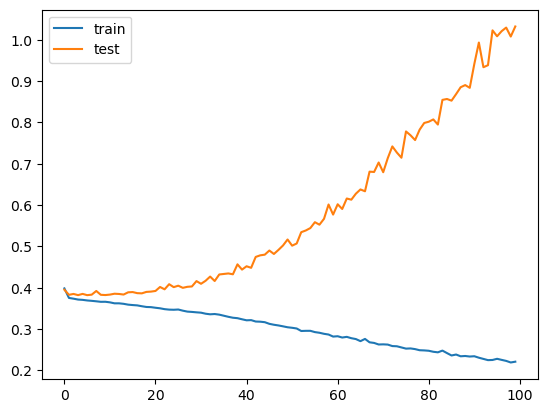

In [ ]:
model = BinaryClassifier()
# Initialize SGD optimizer
opt = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, opt, epochs=100, print_every=10)

As you can see, the model is clearly overfitting as the number of epochs are increasing. Deep Neural networks often get into these kind of problems. In the next module we will learn how to solve these problems.


# Module 3 Video 4 - Vanishing and Exploding Gradients

To quickly recap our progress, we built a deep learning model for zeta analytics to predict the probability of an enrollee looking for a new job. Our last model used the Adam optimizer and we saw that it was heavily overfitting.  Further, this model currently does not face the problem of vanishing gradients, as the training loss is still decreasing. But still, let's try to see if our Leaky Relu activation function helps improve the overall performance. The below code has been modified to incorporate leaky relu in it. Note that taking into consideration, the execution time for the code, i've already run it earlier and the output looks like this.

In [ ]:
class BinaryClassifierLeakyReLU(nn.Module):
    def __init__(self):
        super(BinaryClassifierLeakyReLU, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.leaky_relu(self.layer1(x), negative_slope=0.01)  # Using Leaky ReLU
        x = F.leaky_relu(self.layer2(x), negative_slope=0.01)  # Using Leaky ReLU
        x = F.leaky_relu(self.layer3(x), negative_slope=0.01)  # Using Leaky ReLU
        x = torch.sigmoid(self.layer4(x))  # Using sigmoid for binary classification
        return x


Epoch 10/100,Train Loss: 0.3644, Test Loss: 0.3857, Train Auc: 0.6900, Test Auc: 0.6374
Epoch 20/100,Train Loss: 0.3516, Test Loss: 0.3952, Train Auc: 0.7275, Test Auc: 0.6293
Epoch 30/100,Train Loss: 0.3362, Test Loss: 0.4233, Train Auc: 0.7654, Test Auc: 0.6100
Epoch 40/100,Train Loss: 0.3155, Test Loss: 0.4867, Train Auc: 0.7987, Test Auc: 0.5892
Epoch 50/100,Train Loss: 0.2957, Test Loss: 0.5632, Train Auc: 0.8381, Test Auc: 0.5711
Epoch 60/100,Train Loss: 0.2734, Test Loss: 0.6597, Train Auc: 0.8564, Test Auc: 0.5632
Epoch 70/100,Train Loss: 0.2652, Test Loss: 0.7697, Train Auc: 0.8774, Test Auc: 0.5582
Epoch 80/100,Train Loss: 0.2392, Test Loss: 0.9148, Train Auc: 0.8977, Test Auc: 0.5497
Epoch 90/100,Train Loss: 0.2241, Test Loss: 1.0877, Train Auc: 0.9125, Test Auc: 0.5415
Epoch 100/100,Train Loss: 0.2095, Test Loss: 1.2964, Train Auc: 0.9267, Test Auc: 0.5374


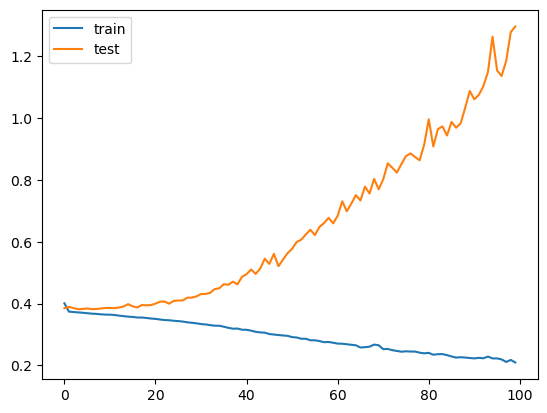

In [ ]:
model = BinaryClassifierLeakyReLU()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

Looking at the plot, conclusively there isn't a significant improvement. Let's try our next technique that is Batch normalization to see if the performance improves.

In [ ]:
class BinaryClassifierBN(nn.Module):
    def __init__(self):
        super(BinaryClassifierBN, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.layer4(x))
        return x

Epoch 10/100,Train Loss: 0.3550, Test Loss: 0.3934, Train Auc: 0.7368, Test Auc: 0.6260
Epoch 20/100,Train Loss: 0.3331, Test Loss: 0.4073, Train Auc: 0.7929, Test Auc: 0.6116
Epoch 30/100,Train Loss: 0.3022, Test Loss: 0.4604, Train Auc: 0.8353, Test Auc: 0.5776
Epoch 40/100,Train Loss: 0.2753, Test Loss: 0.4955, Train Auc: 0.8861, Test Auc: 0.5726
Epoch 50/100,Train Loss: 0.2502, Test Loss: 0.5476, Train Auc: 0.9104, Test Auc: 0.5687
Epoch 60/100,Train Loss: 0.2309, Test Loss: 0.5980, Train Auc: 0.9349, Test Auc: 0.5558
Epoch 70/100,Train Loss: 0.2135, Test Loss: 0.6716, Train Auc: 0.9450, Test Auc: 0.5661
Epoch 80/100,Train Loss: 0.2019, Test Loss: 0.6941, Train Auc: 0.9509, Test Auc: 0.5670
Epoch 90/100,Train Loss: 0.1915, Test Loss: 0.7478, Train Auc: 0.9655, Test Auc: 0.5372
Epoch 100/100,Train Loss: 0.1798, Test Loss: 0.8013, Train Auc: 0.9691, Test Auc: 0.5475


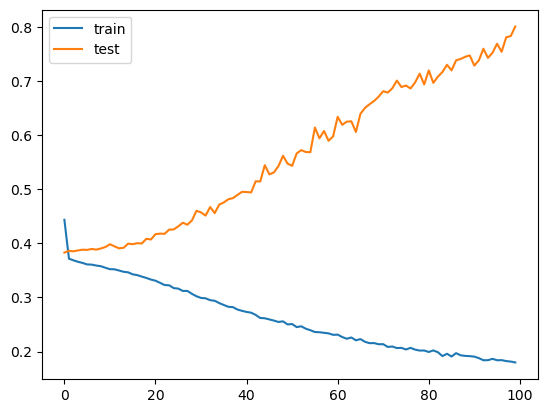

In [ ]:
model = BinaryClassifierBN()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

If you look at this plot one thing is noticeable. Previously, without batch normalization, the train loss value after 100 epochs reached clearly over 1. Here, even after 100 epochs, it is at a maximum of 0.8. We know that Batch normalization provides only limited regularisation. But "Something is better than nothing".

In summary, when training deep neural networks, we must be vigilant of vanishing and exploding gradients, which can impede learning and model convergence.As we've seen, these issues stem from the choice of activation functions and weight initialization methods.
To combat these challenges, adopting non-saturating activation functions like ReLu and its variants can provide significant improvements. Leveraging simple yet powerful techniques such as batch normalization can also do wonders. Next let’s address the issue of overfitting directly!`

# Module 3 Video 6 - Solving Overfitting

Let's wait no further and apply the regularization techniques discussed in the earlier video on the zeta analytics model. For deep learning algorithms, dropout is one of the most important techniques to perform regularisation. Let's see what the impact of dropout is on this model.

In [ ]:
class BinaryClassifierDropout(nn.Module):
    def __init__(self):
        super(BinaryClassifierDropout, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.dropout1 = nn.Dropout(0.5)
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.dropout2 = nn.Dropout(0.5)
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.dropout3 = nn.Dropout(0.5)
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = self.dropout1(x)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = self.dropout2(x)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = self.dropout3(x)
        x = torch.sigmoid(self.layer4(x))
        return x


Epoch 10/100,Train Loss: 0.3796, Test Loss: 0.3852, Train Auc: 0.6706, Test Auc: 0.6470
Epoch 20/100,Train Loss: 0.3738, Test Loss: 0.3841, Train Auc: 0.6845, Test Auc: 0.6447
Epoch 30/100,Train Loss: 0.3696, Test Loss: 0.3834, Train Auc: 0.6914, Test Auc: 0.6467
Epoch 40/100,Train Loss: 0.3684, Test Loss: 0.3829, Train Auc: 0.6982, Test Auc: 0.6490
Epoch 50/100,Train Loss: 0.3654, Test Loss: 0.3843, Train Auc: 0.7030, Test Auc: 0.6475
Epoch 60/100,Train Loss: 0.3647, Test Loss: 0.3852, Train Auc: 0.7128, Test Auc: 0.6446
Epoch 70/100,Train Loss: 0.3632, Test Loss: 0.3860, Train Auc: 0.7168, Test Auc: 0.6413
Epoch 80/100,Train Loss: 0.3637, Test Loss: 0.3873, Train Auc: 0.7210, Test Auc: 0.6402
Epoch 90/100,Train Loss: 0.3606, Test Loss: 0.3868, Train Auc: 0.7291, Test Auc: 0.6448
Epoch 100/100,Train Loss: 0.3608, Test Loss: 0.3877, Train Auc: 0.7352, Test Auc: 0.6393


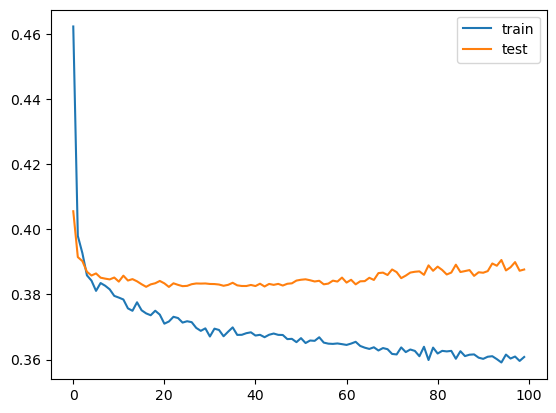

In [ ]:
model = BinaryClassifierDropout()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

By using the dropout technique, the overfitting in our model has been significantly reduced. The AUC score is not only the highest we have observed so far, it is also more consistent across epochs.

We have used a droput rate of 0.5 in all the layers. Feel free to try different dropout rates and observe how the performance changes, based on the value.

Now lets look at the impact of L2 regularisation using weight decay on this model. Note that this parameter has to be added in the optimiser. We will also remove the dropouts from the model for a fair comparison between the performance of the models using the two techniques that is dropout and weight decay.

In [ ]:
class BinaryClassifierL2(nn.Module):
    def __init__(self):
        super(BinaryClassifierL2, self).__init__()
        self.layer1 = nn.Linear(X_train.shape[1], 256)
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization layer
        self.layer2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization layer
        self.layer3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization layer
        self.layer4 = nn.Linear(64, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.layer1(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn2(self.layer2(x)), negative_slope=0.01)
        x = F.leaky_relu(self.bn3(self.layer3(x)), negative_slope=0.01)
        x = torch.sigmoid(self.layer4(x))
        return x

Epoch 10/100,Train Loss: 0.3543, Test Loss: 0.3910, Train Auc: 0.7458, Test Auc: 0.6263
Epoch 20/100,Train Loss: 0.3326, Test Loss: 0.4082, Train Auc: 0.8005, Test Auc: 0.6149
Epoch 30/100,Train Loss: 0.3007, Test Loss: 0.4603, Train Auc: 0.8434, Test Auc: 0.5816
Epoch 40/100,Train Loss: 0.2760, Test Loss: 0.5011, Train Auc: 0.8899, Test Auc: 0.5728
Epoch 50/100,Train Loss: 0.2515, Test Loss: 0.5639, Train Auc: 0.9075, Test Auc: 0.5598
Epoch 60/100,Train Loss: 0.2331, Test Loss: 0.6064, Train Auc: 0.9372, Test Auc: 0.5474
Epoch 70/100,Train Loss: 0.2184, Test Loss: 0.6502, Train Auc: 0.9450, Test Auc: 0.5487
Epoch 80/100,Train Loss: 0.2084, Test Loss: 0.7044, Train Auc: 0.9489, Test Auc: 0.5405
Epoch 90/100,Train Loss: 0.1995, Test Loss: 0.7435, Train Auc: 0.9603, Test Auc: 0.5344
Epoch 100/100,Train Loss: 0.1908, Test Loss: 0.7878, Train Auc: 0.9617, Test Auc: 0.5391


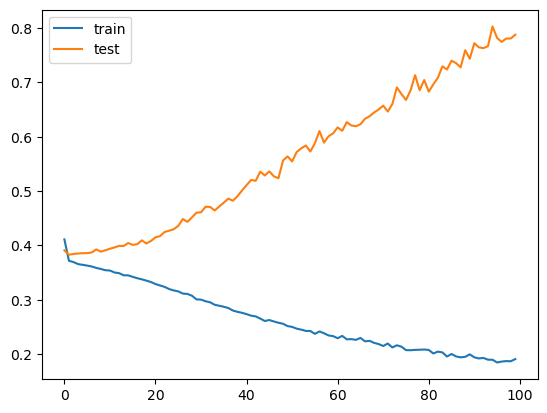

In [ ]:
model = BinaryClassifierL2()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), weight_decay=1e-5)
# Train using optimizer_sgd
train_and_evaluate_model(model, optimizer, epochs=100, print_every=10)

Looking at the plot, we can conclude that this regularisation is not as strong as Dropout. The model is still a highly overfit model. Why dont you try out different values of weight decay such as 10^-4,  10^-3, or even 10^-2, and see if that gives better results? In fact let me give you an inside secret, one of these values is definitely going to give you better results.

Next lets try to implement early stopping on the Dropout model.


In pytorch, early stopping can be implemented in 2 different ways. The first method is to implement it manually by coding and the second way is to use some libraries like Pytorch Lightning or early-stopiing-pytorch. Note that here will will implement early stopping manually, by modifying our original function 'train_and_evaluate_model'. Take a look at the code

Here, i've set a parameter max_patience to 10. This means that the model will wait for 10 epochs to observe improvements in the test loss. If that does not occur the model will stop training. Further, I've used simple if else clauses to end the training using this criterion. Let's take a look at the results!

In [ ]:
# Training and Evaluation Loop
def train_and_evaluate_model_es(model, optimizer, batch_size = 128, epochs=25, print_every=5):
    model.train()  # set model to train mode

    train_loss_list=[]
    test_loss_list = []

    best_val_loss = float('inf')
    patience = 0
    max_patience = 10  # Maximum epochs to wait for improvement

    # Convert the tensor based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor, y_train_tensor)
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = JobChangeDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train() # set the model to train mode for each epoch, since we are setting it to eval mode later
        for i, (features, labels) in enumerate(train_loader):
            optimizer.zero_grad() # Clear the gradients of all optimized variables
            outputs = model(features) # pass our data(input features) through the model
            loss = criterion(outputs.squeeze(), labels) # calculate the loss between model outputs and expected labels
            loss.backward() # Backward pass: compute the gradient of the loss with respect to model parameters
            optimizer.step() # Perform a single optimization step (parameter update)
            train_loss += loss.item() # Accumulate the training loss to later calculate the average

        # Calculate the average training loss for current epoch
        train_loss = train_loss / len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on test set
        model.eval() # Switch model to evaluation mode
        test_loss = 0.0
        # Disable gradient calculation for evaluation to save memory and computations
        with torch.no_grad():
            # Iterate over the test dataset
            for features, labels in test_loader:
                outputs = model(features) # Forward pass: compute the output of the model by passing the input features
                loss = criterion(outputs.squeeze(), labels) # Calculate the loss between the model output and expected labels
                test_loss += loss.item() # Accumulate the test loss to later calculate the average
            train_auc = roc_auc_score(y_train_tensor, model(X_train_tensor))
            test_auc = roc_auc_score(y_test_tensor, model(X_test_tensor))

        # Calculate test loss for epoch
        test_loss = test_loss / len(test_loader)
        test_loss_list.append(test_loss)

# Implementing Early stoping
        if test_loss < best_val_loss:
            best_val_loss = test_loss
            patience = 0
            # torch.save(model.state_dict(), 'best_model.pt')
        else:
            patience += 1

        if patience >= max_patience:
            print(f'Early stopped at {epoch+1}')
            break  # Stop training

        # Print losses
        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs},Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Train Auc: {train_auc:.4f}, Test Auc: {test_auc:.4f}')

    plt.plot(range(len(train_loss_list)),train_loss_list, label = 'train')
    plt.plot(range(len(train_loss_list)),test_loss_list, label = 'test')
    plt.legend()
    plt.show()



Epoch 10/100,Train Loss: 0.3793, Test Loss: 0.3849, Train Auc: 0.6743, Test Auc: 0.6460
Epoch 20/100,Train Loss: 0.3746, Test Loss: 0.3822, Train Auc: 0.6854, Test Auc: 0.6518
Epoch 30/100,Train Loss: 0.3702, Test Loss: 0.3810, Train Auc: 0.6938, Test Auc: 0.6560
Epoch 40/100,Train Loss: 0.3665, Test Loss: 0.3825, Train Auc: 0.7011, Test Auc: 0.6519
Early stopped at 48


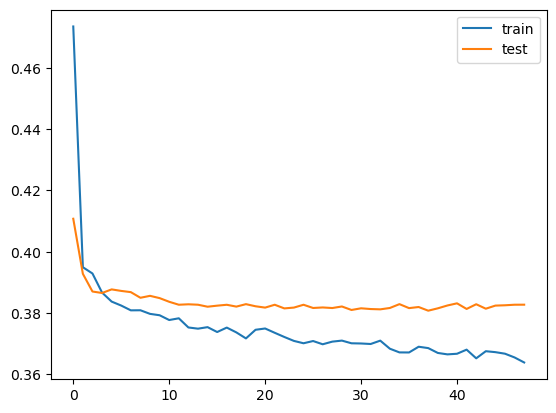

In [ ]:
model = BinaryClassifierDropout()
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters())
# Train using optimizer_sgd
train_and_evaluate_model_es(model, optimizer, epochs=100, print_every=10)

As you can observe, here the model stopped early at Epoch number 33, because the loss on the test set did not improve from the last 10 epochs. Even though i set the max_parameter to 10, feel free to increase or decrease this and analyze the model performance. With that, I'm sure you can easily fix any overfiting deep learning model given a real world scenario. I'll see you later with more ways to improve model performance.

# Module 3 Video 7 - Tune hyperparameters with the Optuna package

Now let's tune our zeta analytics model parameters using Optuna. Here we will first re-define the training function so that it returns the train and test set AUC score. These will be used by the optuna library to tune the parameters of the model.

In [ ]:
device = "cpu"

In [ ]:
def train_and_evaluate_model_optuna(model, optimizer_optuna, batch_size=128, epochs=25, print_every=5, show_plot=False):
    # model.to(device)  # Move the model to the designated device

    model.train()  # Set model to train mode

    train_loss_list = []
    test_loss_list = []

    # Convert the tensor-based data to torch Dataset objects
    train_dataset = JobChangeDataset(X_train_tensor.to(device), y_train_tensor.to(device))
    # Define torch data loader objects for these datasets
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

    test_dataset = JobChangeDataset(X_test_tensor.to(device), y_test_tensor.to(device))
    test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.BCELoss()

    # Train for the defined number of epochs
    for epoch in range(epochs):
        train_loss = 0.0
        model.train()
        for features, labels in train_loader:
            # features, labels = features.to(device), labels.to(device)  # Move data to the device

            optimizer_optuna.zero_grad()  # Clear the gradients of all optimized variables
            outputs = model(features)  # Pass data through the model
            loss = criterion(outputs.squeeze(), labels)  # Calculate loss
            loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
            optimizer_optuna.step()  # Perform a single optimization step (parameter update)
            train_loss += loss.item()  # Accumulate the training loss

        # Calculate the average training loss for the current epoch
        train_loss /= len(train_loader)
        train_loss_list.append(train_loss)

        # Evaluate on the test set
        model.eval()  # Switch model to evaluation mode
        test_loss = 0.0
        with torch.no_grad():  # Disable gradient calculation
            for features, labels in test_loader:
                # features, labels = features.to(device), labels.to(device)  # Move data to the device
                outputs = model(features)
                loss = criterion(outputs.squeeze(), labels)
                test_loss += loss.item()

        test_loss /= len(test_loader)
        test_loss_list.append(test_loss)

        if (epoch + 1) % print_every == 0:
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

            # set model to evaluation mode
            model.eval()
            with torch.no_grad():
                train_preds = model(X_train_tensor.to(device)).squeeze()
                test_preds = model(X_test_tensor.to(device)).squeeze()
                train_auc = roc_auc_score(y_train_tensor.cpu(), train_preds.cpu())
                test_auc = roc_auc_score(y_test_tensor.cpu(), test_preds.cpu())

            print(f'Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}')
    if (show_plot):
        plt.plot(range(epochs),train_loss_list, label = 'train')
        plt.plot(range(epochs),test_loss_list, label = 'test')
        plt.legend()
        plt.show()

    # Returning the last epoch AUC values for Optuna optimization
    return train_auc, test_auc


Next, let's define a generic class definition which can be instantiated with different hyperparameters. This will be used by the optuna package to find the optimal hyperparameter settings. Here we've used relu af but feel free to uuse leaky relu if you wish to.

In [ ]:
class BinaryClassifierDropoutOptuna(nn.Module):
    def __init__(self, num_features, num_classes, dropout_rate, num_layers, num_nodes):
        super(BinaryClassifierDropoutOptuna, self).__init__()
        layers = []
        prev_nodes = num_features  # Input size

        # Dynamically create layers based on num_layers and num_nodes
        for _ in range(num_layers):
            layers.append(nn.Linear(prev_nodes, num_nodes))
            layers.append(nn.ReLU()) # You could also try Leakt ReLU
            layers.append(nn.Dropout(dropout_rate))
            layers.append(nn.BatchNorm1d(num_nodes))
            prev_nodes = num_nodes  # Update prev_nodes for the next layer

        # Output layer
        layers.append(nn.Linear(prev_nodes, num_classes))
        self.layers = nn.Sequential(*layers)

    def forward(self, x):
        x = self.layers(x)
        x = torch.sigmoid(x)
        return x



Let's define the ranges for the hyperparameters we wish to tune. Here I've set a range for the dropout rate as 0.1 to 0.5. Further we have set the range for the number of layers between 2 to 5. For the number of nodes, I've set a range of 64 to 128. In the interest of speed of execution I've used a limited range of layers and neurons. You can try larger values for these . Lastly for learning rate I am setting a range of 10^-1 to 10^-5. These ranges may not give the best results but it will surely help you understand the practical application of hyperparameter tuning for deep learning models.

In [ ]:
def objective(trial):
    # Hyperparameters to be optimized
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5) # trial range will be from 0.1 to 0.5
    num_layers = trial.suggest_int('num_layers', 2, 5)  # Suggesting 1 to 3 layers
    num_nodes = trial.suggest_categorical('num_nodes', [64, 128])  # Nodes per layer options
    lr = trial.suggest_float('lr', 1e-5, 1e-1, log=True) # trying different learning rates

    # Model instantiation
    model = BinaryClassifierDropoutOptuna(num_features=X_train.shape[1], num_classes=1,
                                    dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train and evaluate the model
    train_auc, test_auc = train_and_evaluate_model_optuna(model, optimizer, epochs=30, print_every=30)

    return test_auc


In the above code the last line specifies to return the test_auc score. This will feed into the optuna library for optimization. This is because our ultimate goal is to maximize the test_auc score. With our ranges dialled in, next let's set the number of combinations we wish to try. We are going to try 50 combinations here. If you recall, in the earlier video we had looked at different approaches such as grid search, random search and bayesian optimization.  By default optuna.create study uses a TPE sampler which is a bayesian optimisation algorithm. You could also try the other two approaches that is Grid and random sampler here. Note that, running this code is going to take some time. In my system it took a total of 13 minutes to run and this may increase or decrease depending on your system capabilities.

In [ ]:
import optuna

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Display the best trial results
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-03-11 15:43:03,969] A new study created in memory with name: no-name-ff9ece36-4f0a-4612-8bdf-1c6768096cf5
[I 2024-03-11 15:43:14,503] Trial 0 finished with value: 0.6483619167717528 and parameters: {'dropout_rate': 0.38632150653937924, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0003570338306032114}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3758, Test Loss: 0.3827
Train AUC: 0.6811, Test AUC: 0.6484


[I 2024-03-11 15:43:25,482] Trial 1 finished with value: 0.6457087011349306 and parameters: {'dropout_rate': 0.21627511032733027, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.002317321351462264}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3639, Test Loss: 0.3863
Train AUC: 0.7129, Test AUC: 0.6457


[I 2024-03-11 15:43:36,087] Trial 2 finished with value: 0.6404104665825976 and parameters: {'dropout_rate': 0.35658007335453046, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.0010675636240794406}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3699, Test Loss: 0.3842
Train AUC: 0.6882, Test AUC: 0.6404


[I 2024-03-11 15:43:45,705] Trial 3 finished with value: 0.6239968474148802 and parameters: {'dropout_rate': 0.11377798868401921, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.000591232486418012}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3482, Test Loss: 0.4022
Train AUC: 0.7665, Test AUC: 0.6240


[I 2024-03-11 15:43:56,511] Trial 4 finished with value: 0.627873896595208 and parameters: {'dropout_rate': 0.26896036613140584, 'num_layers': 3, 'num_nodes': 64, 'lr': 2.2580400451934447e-05}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.5857, Test Loss: 0.5670
Train AUC: 0.6455, Test AUC: 0.6279


[I 2024-03-11 15:44:05,728] Trial 5 finished with value: 0.6427436948297605 and parameters: {'dropout_rate': 0.3866569253108557, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.014671303415149509}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3743, Test Loss: 0.3838
Train AUC: 0.6725, Test AUC: 0.6427


[I 2024-03-11 15:44:19,815] Trial 6 finished with value: 0.6294482976040353 and parameters: {'dropout_rate': 0.15745502960922975, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.00019110026290811182}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3678, Test Loss: 0.3931
Train AUC: 0.7308, Test AUC: 0.6294


[I 2024-03-11 15:44:31,584] Trial 7 finished with value: 0.640452711223203 and parameters: {'dropout_rate': 0.30435289680228006, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.0007747804223307762}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3730, Test Loss: 0.3838
Train AUC: 0.6797, Test AUC: 0.6405


[I 2024-03-11 15:44:45,095] Trial 8 finished with value: 0.642014817150063 and parameters: {'dropout_rate': 0.4614204266741775, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.012834558317647638}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3748, Test Loss: 0.3845
Train AUC: 0.6690, Test AUC: 0.6420


[I 2024-03-11 15:44:53,432] Trial 9 finished with value: 0.6438152585119798 and parameters: {'dropout_rate': 0.12985258037899278, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0007643130720343228}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3596, Test Loss: 0.3876
Train AUC: 0.7291, Test AUC: 0.6438


[I 2024-03-11 15:45:08,695] Trial 10 finished with value: 0.38506494325346785 and parameters: {'dropout_rate': 0.49835546597395725, 'num_layers': 5, 'num_nodes': 128, 'lr': 0.08345092238150896}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.4010, Test Loss: 0.7079
Train AUC: 0.3841, Test AUC: 0.3851


[I 2024-03-11 15:45:21,962] Trial 11 finished with value: 0.6293177805800757 and parameters: {'dropout_rate': 0.24639576283884987, 'num_layers': 4, 'num_nodes': 128, 'lr': 0.0001115835440494619}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3857, Test Loss: 0.3870
Train AUC: 0.6836, Test AUC: 0.6293


[I 2024-03-11 15:45:31,554] Trial 12 finished with value: 0.627530895334174 and parameters: {'dropout_rate': 0.20835260656589405, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.004827479638421266}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3653, Test Loss: 0.3912
Train AUC: 0.7060, Test AUC: 0.6275


[I 2024-03-11 15:45:42,972] Trial 13 finished with value: 0.6465069356872635 and parameters: {'dropout_rate': 0.3881864555654563, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.004268655114254359}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3695, Test Loss: 0.3828
Train AUC: 0.6863, Test AUC: 0.6465


[I 2024-03-11 15:45:54,679] Trial 14 finished with value: 0.6010195460277428 and parameters: {'dropout_rate': 0.4070163515383093, 'num_layers': 4, 'num_nodes': 64, 'lr': 7.65219909048519e-05}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.4139, Test Loss: 0.3919
Train AUC: 0.6225, Test AUC: 0.6010


[I 2024-03-11 15:46:04,934] Trial 15 finished with value: 0.6353991172761664 and parameters: {'dropout_rate': 0.3216579360731898, 'num_layers': 2, 'num_nodes': 128, 'lr': 1.2014296301112896e-05}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.6035, Test Loss: 0.5850
Train AUC: 0.6455, Test AUC: 0.6354


[I 2024-03-11 15:46:16,633] Trial 16 finished with value: 0.6435706179066835 and parameters: {'dropout_rate': 0.42810953242997574, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.05179682031886473}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3827, Test Loss: 0.5823
Train AUC: 0.6598, Test AUC: 0.6436


[I 2024-03-11 15:46:26,483] Trial 17 finished with value: 0.6459293820933165 and parameters: {'dropout_rate': 0.3489897021787558, 'num_layers': 2, 'num_nodes': 128, 'lr': 0.003966239094810013}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3680, Test Loss: 0.3850
Train AUC: 0.6937, Test AUC: 0.6459


[I 2024-03-11 15:46:38,955] Trial 18 finished with value: 0.6373348045397227 and parameters: {'dropout_rate': 0.43245030401291723, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.00019940014928499061}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3830, Test Loss: 0.3862
Train AUC: 0.6754, Test AUC: 0.6373


[I 2024-03-11 15:46:50,155] Trial 19 finished with value: 0.6351778058007566 and parameters: {'dropout_rate': 0.3679681899728917, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.019568159431336486}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3760, Test Loss: 0.4416
Train AUC: 0.6674, Test AUC: 0.6352


[I 2024-03-11 15:46:58,746] Trial 20 finished with value: 0.6464498738965951 and parameters: {'dropout_rate': 0.4692976216569915, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0024237997322761992}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3709, Test Loss: 0.3841
Train AUC: 0.6813, Test AUC: 0.6464


[I 2024-03-11 15:47:07,420] Trial 21 finished with value: 0.6476617276166456 and parameters: {'dropout_rate': 0.47839173315645894, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0018291563308197901}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3707, Test Loss: 0.3824
Train AUC: 0.6817, Test AUC: 0.6477


[I 2024-03-11 15:47:15,814] Trial 22 finished with value: 0.6435217528373266 and parameters: {'dropout_rate': 0.44948793341032434, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0002948620594594589}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3796, Test Loss: 0.3841
Train AUC: 0.6730, Test AUC: 0.6435


[I 2024-03-11 15:47:25,661] Trial 23 finished with value: 0.6416289407313998 and parameters: {'dropout_rate': 0.4015567275585288, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.007265899046822361}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3726, Test Loss: 0.3840
Train AUC: 0.6757, Test AUC: 0.6416


[I 2024-03-11 15:47:33,859] Trial 24 finished with value: 0.6440044136191677 and parameters: {'dropout_rate': 0.4892291637519204, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0015558797827793416}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3717, Test Loss: 0.3835
Train AUC: 0.6803, Test AUC: 0.6440


[I 2024-03-11 15:47:43,846] Trial 25 finished with value: 0.6453146279949559 and parameters: {'dropout_rate': 0.33381219187363476, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.00039712371472864117}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3785, Test Loss: 0.3827
Train AUC: 0.6794, Test AUC: 0.6453


[I 2024-03-11 15:47:52,872] Trial 26 finished with value: 0.6266071878940731 and parameters: {'dropout_rate': 0.3895077909514947, 'num_layers': 2, 'num_nodes': 128, 'lr': 5.9948679875303004e-05}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3983, Test Loss: 0.3867
Train AUC: 0.6755, Test AUC: 0.6266


[I 2024-03-11 15:48:01,303] Trial 27 finished with value: 0.6455031525851198 and parameters: {'dropout_rate': 0.43074070329450487, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.03342463578905252}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3766, Test Loss: 0.3833
Train AUC: 0.6650, Test AUC: 0.6455


[I 2024-03-11 15:48:12,153] Trial 28 finished with value: 0.6437213114754099 and parameters: {'dropout_rate': 0.28508328767755386, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.005924739396534157}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3674, Test Loss: 0.3900
Train AUC: 0.6942, Test AUC: 0.6437


[I 2024-03-11 15:48:23,143] Trial 29 finished with value: 0.6373124211853721 and parameters: {'dropout_rate': 0.3786897254744539, 'num_layers': 3, 'num_nodes': 128, 'lr': 0.0017161346433886943}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3696, Test Loss: 0.3854
Train AUC: 0.6920, Test AUC: 0.6373


[I 2024-03-11 15:48:34,553] Trial 30 finished with value: 0.6437591424968474 and parameters: {'dropout_rate': 0.4185270602512292, 'num_layers': 4, 'num_nodes': 64, 'lr': 0.00337630137309137}. Best is trial 0 with value: 0.6483619167717528.


Epoch 30/30, Train Loss: 0.3711, Test Loss: 0.3840
Train AUC: 0.6750, Test AUC: 0.6438


[I 2024-03-11 15:48:43,364] Trial 31 finished with value: 0.6486462799495586 and parameters: {'dropout_rate': 0.45612737902005746, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.002208779298419755}. Best is trial 31 with value: 0.6486462799495586.


Epoch 30/30, Train Loss: 0.3716, Test Loss: 0.3835
Train AUC: 0.6805, Test AUC: 0.6486


[I 2024-03-11 15:48:51,784] Trial 32 finished with value: 0.6429533417402271 and parameters: {'dropout_rate': 0.4660888384882546, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0012541814505417864}. Best is trial 31 with value: 0.6486462799495586.


Epoch 30/30, Train Loss: 0.3703, Test Loss: 0.3837
Train AUC: 0.6851, Test AUC: 0.6430


[I 2024-03-11 15:49:00,266] Trial 33 finished with value: 0.6457093316519545 and parameters: {'dropout_rate': 0.4816676999617669, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0024710864478103486}. Best is trial 31 with value: 0.6486462799495586.


Epoch 30/30, Train Loss: 0.3707, Test Loss: 0.3839
Train AUC: 0.6790, Test AUC: 0.6457


[I 2024-03-11 15:49:08,445] Trial 34 finished with value: 0.6430510718789407 and parameters: {'dropout_rate': 0.44908448990309585, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.00043833126386439895}. Best is trial 31 with value: 0.6486462799495586.


Epoch 30/30, Train Loss: 0.3768, Test Loss: 0.3841
Train AUC: 0.6782, Test AUC: 0.6431


[I 2024-03-11 15:49:18,220] Trial 35 finished with value: 0.6396796973518285 and parameters: {'dropout_rate': 0.35318070853562744, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.008188084609969488}. Best is trial 31 with value: 0.6486462799495586.


Epoch 30/30, Train Loss: 0.3708, Test Loss: 0.4389
Train AUC: 0.6734, Test AUC: 0.6397


[I 2024-03-11 15:49:26,505] Trial 36 finished with value: 0.6548493064312737 and parameters: {'dropout_rate': 0.44546706980167705, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.000996874270051176}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3719, Test Loss: 0.3826
Train AUC: 0.6842, Test AUC: 0.6548


[I 2024-03-11 15:49:34,705] Trial 37 finished with value: 0.6430390920554855 and parameters: {'dropout_rate': 0.44248390156924944, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0008874233154386318}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3712, Test Loss: 0.3840
Train AUC: 0.6850, Test AUC: 0.6430


[I 2024-03-11 15:49:43,047] Trial 38 finished with value: 0.6437080706179067 and parameters: {'dropout_rate': 0.4999897426439791, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0004552682986206511}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3763, Test Loss: 0.3853
Train AUC: 0.6771, Test AUC: 0.6437


[I 2024-03-11 15:49:51,258] Trial 39 finished with value: 0.6467786885245902 and parameters: {'dropout_rate': 0.4712832987335957, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.00021965739007479045}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3851, Test Loss: 0.3825
Train AUC: 0.6691, Test AUC: 0.6468


[I 2024-03-11 15:49:59,612] Trial 40 finished with value: 0.6475617906683481 and parameters: {'dropout_rate': 0.41410685901631356, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0009579152097109519}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3688, Test Loss: 0.3871
Train AUC: 0.6911, Test AUC: 0.6476


[I 2024-03-11 15:50:08,749] Trial 41 finished with value: 0.6410365699873896 and parameters: {'dropout_rate': 0.41560521185416033, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0006832761738419112}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3726, Test Loss: 0.3838
Train AUC: 0.6890, Test AUC: 0.6410


[I 2024-03-11 15:50:17,007] Trial 42 finished with value: 0.6456424968474149 and parameters: {'dropout_rate': 0.4510376173096219, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0011201965923111257}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3711, Test Loss: 0.3876
Train AUC: 0.6842, Test AUC: 0.6456


[I 2024-03-11 15:50:25,343] Trial 43 finished with value: 0.6493316519546027 and parameters: {'dropout_rate': 0.4018958936204954, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0020806865435114624}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3694, Test Loss: 0.3837
Train AUC: 0.6841, Test AUC: 0.6493


[I 2024-03-11 15:50:33,636] Trial 44 finished with value: 0.6448991172761664 and parameters: {'dropout_rate': 0.37105178509943987, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.002571087977442266}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3691, Test Loss: 0.3845
Train AUC: 0.6867, Test AUC: 0.6449


[I 2024-03-11 15:50:42,383] Trial 45 finished with value: 0.644813366960908 and parameters: {'dropout_rate': 0.477352859391708, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.0016530406040049495}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3698, Test Loss: 0.3829
Train AUC: 0.6782, Test AUC: 0.6448


[I 2024-03-11 15:50:56,639] Trial 46 finished with value: 0.5761711853720051 and parameters: {'dropout_rate': 0.4575863537049072, 'num_layers': 5, 'num_nodes': 64, 'lr': 0.00011562744372177935}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.4057, Test Loss: 0.3963
Train AUC: 0.5995, Test AUC: 0.5762


[I 2024-03-11 15:51:05,299] Trial 47 finished with value: 0.649234552332913 and parameters: {'dropout_rate': 0.18628473244035193, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.009760408213631267}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3675, Test Loss: 0.4647
Train AUC: 0.6874, Test AUC: 0.6492


[I 2024-03-11 15:51:15,968] Trial 48 finished with value: 0.6432726986128625 and parameters: {'dropout_rate': 0.18628172646516059, 'num_layers': 3, 'num_nodes': 64, 'lr': 0.010846970677843298}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3687, Test Loss: 0.3841
Train AUC: 0.6889, Test AUC: 0.6433


[I 2024-03-11 15:51:24,989] Trial 49 finished with value: 0.6399098360655737 and parameters: {'dropout_rate': 0.23280439158991303, 'num_layers': 2, 'num_nodes': 64, 'lr': 0.01493421458131136}. Best is trial 36 with value: 0.6548493064312737.


Epoch 30/30, Train Loss: 0.3721, Test Loss: 0.3888
Train AUC: 0.6768, Test AUC: 0.6399
Best trial:
  Value:  0.6548493064312737
  Params: 
    dropout_rate: 0.44546706980167705
    num_layers: 2
    num_nodes: 64
    lr: 0.000996874270051176


We've got our best model parameters. Let's now use these hyperparameters suggested by Optuna to build our model with early stopping.

In [ ]:
dropout_rate = trial.params['dropout_rate']
num_layers = trial.params['num_layers']
num_nodes = trial.params['num_nodes']
lr = trial.params['lr']


num_features = X_train.shape[1]
num_classes = 1  # For binary classification

# Initialize model with best hyperparameters
model = BinaryClassifierDropoutOptuna(num_features=num_features, num_classes=num_classes,
                                 dropout_rate=dropout_rate, num_layers=num_layers, num_nodes=num_nodes).to(device)


Epoch 10/100,Train Loss: 0.3786, Test Loss: 0.3846, Train Auc: 0.6710, Test Auc: 0.6442
Epoch 20/100,Train Loss: 0.3752, Test Loss: 0.3843, Train Auc: 0.6785, Test Auc: 0.6449
Early stopped at 25


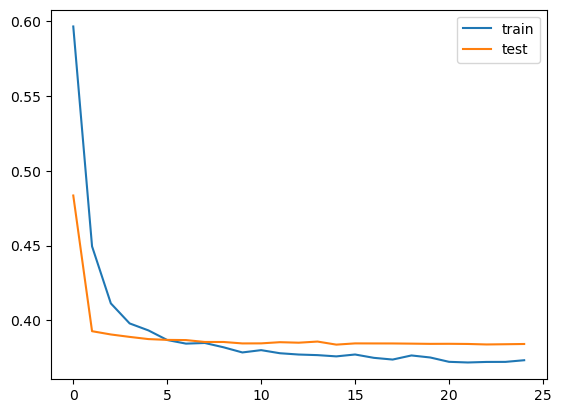

In [ ]:
# Initialize Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=lr)
# Train using optimizer_sgd
train_and_evaluate_model_es(model, optimizer, epochs=100, print_every=10)

The model has early stopped at 75 epochs once it achieved the best test_auc score. From this plot, we can see that the performance is almost the same as earlier, but this is also because of the narrow range of hyperparameters we opted to use. Also we had set n_trials to 50 only in optuna. Feel free to try a wider range of hyperparameters and larger number of trials to further improve the performance, but note that, this will increase the time taken.

With that we've come to the end of this video. Stay tuned to learn how to save and deploy your models in pytorch!

Saving using state_dict

In [ ]:
torch.save(model.state_dict(), 'model.pth')

Saving complete model

In [ ]:
torch.save(model, 'model.pt')